#**😷Mask Vs No-Mask😊**

Creating an image classification model for classifying the images with and without face mask.



##1. Problem Definition
>Classify if given image is of person wearing mask or not

##2. Data

>The original data came from Kaggle. https://www.kaggle.com/ayku09/face-mask-image-classification-data




In [1]:
!wget https://raw.githubusercontent.com/anmolmishra99/Subu/main/subu.py

--2022-02-24 11:44:03--  https://raw.githubusercontent.com/anmolmishra99/Subu/main/subu.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4969 (4.9K) [text/plain]
Saving to: ‘subu.py’

subu.py             100%[===================>]   4.85K  --.-KB/s    in 0s      

2022-02-24 11:44:03 (34.4 MB/s) - ‘subu.py’ saved [4969/4969]



In [2]:
from subu import setup_kaggle
setup_kaggle(True)

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [3]:
!kaggle datasets download -d 'ayku09/face-mask-image-classification-data'

 99% 380M/386M [00:02<00:00, 161MB/s]
100% 386M/386M [00:02<00:00, 137MB/s]


In [4]:
from subu import unzip, walk_through_dir

In [5]:
unzip('/content/face-mask-image-classification-data.zip')

In [6]:
walk_through_dir('Mask_data')

There are 2 directories and 0 images in 'Mask_data'.
There are 0 directories and 3621 images in 'Mask_data/without_mask'.
There are 0 directories and 3645 images in 'Mask_data/with_mask'.


**Spliting Folders**

In [7]:
!pip install split-folders

In [8]:
import splitfolders
splitfolders.ratio('Mask_data', output="mask_data", seed=42, ratio=(.8, 0.1,0.1))

Copying files: 7266 files [00:02, 3006.07 files/s]


In [9]:
train_dir = 'mask_data/train/'
test_dir = 'mask_data/test/'
val_dir = 'mask_data/val/'

In [10]:
import tensorflow as tf

IMG_SIZE = (224,224)

train_data_batches = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE,
                                                                         label_mode='categorical')

val_data_batches = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                       batch_size=32,
                                                                       image_size=IMG_SIZE,
                                                                       label_mode='categorical')

Found 5812 files belonging to 2 classes.
Found 726 files belonging to 2 classes.


In [11]:
class_name = train_data_batches.class_names
class_name

['with_mask', 'without_mask']

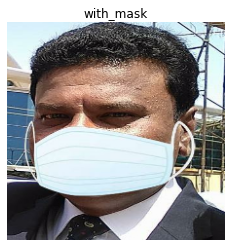

In [12]:
import matplotlib.pyplot as plt
import numpy as np
for image, label in train_data_batches.take(1):
  plt.imshow(image[0]/255.)
  plt.title(class_name[np.argmax(label[0])])
  plt.axis(False)

##Modeling with Functional API

In [13]:
from tensorflow.keras import layers

In [14]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=(224,224,3))
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(len(class_name), activation='softmax')(x)
model = tf.keras.Model(inputs, output)

16719872/16705208 [==============================] - 0s 0us/step


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

history = model.fit(train_data_batches,
          epochs=5,
          steps_per_epoch=len(train_data_batches),
          validation_data=val_data_batches,
          validation_steps=len(val_data_batches))

Epoch 1/5
182/182 [==============================] - 60s 173ms/step - loss: 0.1003 - accuracy: 0.9716 - val_loss: 0.0442 - val_accuracy: 0.9876
Epoch 2/5
182/182 [==============================] - 29s 157ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 3/5
182/182 [==============================] - 29s 157ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.0294 - val_accuracy: 0.9917
Epoch 4/5
182/182 [==============================] - 29s 156ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0256 - val_accuracy: 0.9917
Epoch 5/5
182/182 [==============================] - 29s 156ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0244 - val_accuracy: 0.9945


In [16]:
from subu import plot_loss_curves 
plot_loss_curves(history)

In [18]:
test_data_batches = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                       batch_size=32,
                                                                       image_size=IMG_SIZE,
                                                                       label_mode='categorical')

Found 728 files belonging to 2 classes.


In [19]:
result = model.evaluate(test_data_batches)
result

23/23 [==============================] - 6s 209ms/step - loss: 0.0429 - accuracy: 0.9863


[0.042913008481264114, 0.9862637519836426]

## Making Prediction with model of 99.45% accuracy

[[9.9999857e-01 1.4845368e-06]]


'with_mask'

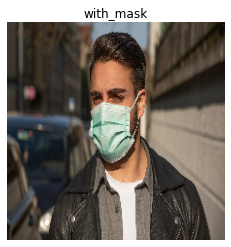

In [31]:
image_dir = '/content/2.jpg'
img = tf.io.read_file(image_dir)
img = tf.image.decode_image(img)
img = tf.image.resize(img, [224,224])
pred = model.predict(tf.expand_dims(img, axis=0))
print(pred)
pred_class = class_name[pred.argmax()]
plt.imshow(img/255.)
plt.title(pred_class)
plt.axis(False)
pred_class


[[0.33356738 0.66643256]]


'without_mask'

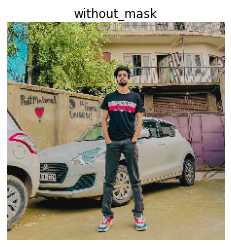

In [28]:
image_dir = '/content/12.jpg'
img = tf.io.read_file(image_dir)
img = tf.image.decode_image(img)
img = tf.image.resize(img, [224,224])
pred = model.predict(tf.expand_dims(img, axis=0))
print(pred)
pred_class = class_name[pred.argmax()]
plt.imshow(img/255.)
plt.title(pred_class)
plt.axis(False)
pred_class


[[0.00440665 0.99559337]]


'without_mask'

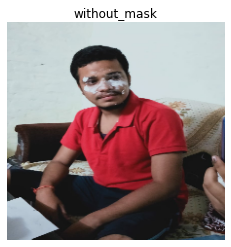

In [32]:
image_dir = '/content/me.jpg'
img = tf.io.read_file(image_dir)
img = tf.image.decode_image(img)
img = tf.image.resize(img, [224,224])
pred = model.predict(tf.expand_dims(img, axis=0))
print(pred)
pred_class = class_name[pred.argmax()]
plt.imshow(img/255.)
plt.title(pred_class)
plt.axis(False)
pred_class
